<img src="https://github.com/ktafakkori/feloopy/raw/main/assets/logo/logo3.png" width="2%"> **Zitzler, Deb, and Thiele Problem (ZDT)** 

(cf. https://doi.org/10.1162/106365600568202)

* Copyright (c) 2022-2024, Keivan Tafakkori. All rights reserved.
* See the file LICENSE file for licensing details.

####  *Required modules*

In [1]:
import feloopy as flp
import matplotlib.pyplot as plt

####  Dataset

In [2]:
config = {'directions': ["min","min"], 'method': "heuristic", 'interface': "pymoo", 'solver':"ns-ga-ii", 'options': {'pop_size': 100, 'n_gen': 1000}, 'key_vars':["x"]}

####  Heuristic Optimization Algorithms

In [3]:
def zdt1(m):
    n = 30
    x = m.pvar('x', dim=[n], bound=[0,1])
    g = 1 + 9.0 / (n - 1) * m.sum(x[:, i] for i in range(1,n))
    m.obj(x[:, 0])
    m.obj(g*(1 - (x[:, 0] /g)**0.5))
    return m

def zdt2(m):
    n = 30
    x = m.pvar('x', dim=[n], bound=[0,1])
    g = 1 + 9.0 / (n - 1) * m.sum(x[:, i] for i in range(1,n))
    m.obj(x[:, 0])
    m.obj(g*(1 - (x[:, 0] /g)**2))
    return m

def zdt3(m):
    n = 30
    x = m.pvar('x', dim=[n], bound=[0,1])
    g = 1 + 9.0 / (n - 1) * m.sum(x[:, i] for i in range(1,n))
    m.obj(x[:, 0])
    m.obj(g*(1 - (x[:, 0] /g)**0.5 - (x[:, 0] /g)*m.sin(10*m.pi*x[:, 0])))
    return m

def zdt4(m):
    n = 10
    y = m.pvar('y', bound=[0,1])
    x = m.fvar('x', dim=[n-1], bound=[-5,5])
    g = 1 + 10*(n - 1) + m.sum(x[:, i]**2-10*m.cos(4*m.pi*x[:,i]) for i in range(n-1))
    m.obj(y[:,0])
    m.obj(g*(1 - (y[:,0]/g)**0.5))
    return m

def zdt5(m):
    n=11
    y = m.bvar('y', dim=[30])
    x = m.bvar('x', dim=[n-1,5])
    f= 1+m.sum(y[:, i] for i in range(30))
    m.obj(f)
    m.obj(1/f * m.sum(m.whether(m.sum(x[:,j,i] for i in range(5))==5, 1, 2 +  m.sum(x[:,j,i] for i in range(5)))  for j in range(n-1)))
    return m

def zdt6(m):
    n = 10
    x = m.pvar('x', dim=[n], bound=[0,1])
    f = 1 - m.exponent(-4 * x[:, 0]) * m.sin(6 * m.pi * x[:, 0])**6
    g = 1 + 9 * (m.sum(x[:, i] for i in range(1,n))/ (n - 1))**0.25
    m.obj(f)
    m.obj(g * (1 - (f / g)**2))
    return m

Text(0, 0.5, 'f2')

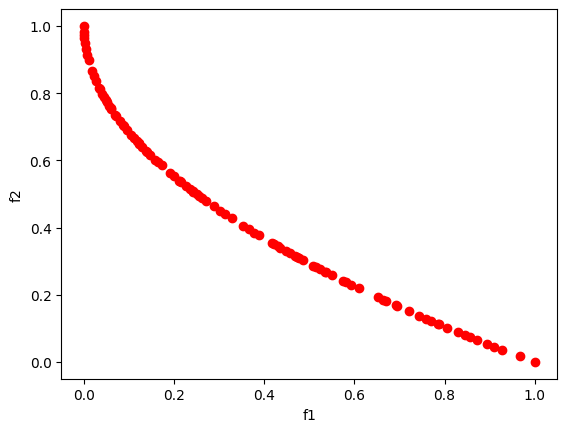

In [4]:
zdt1_objs = flp.search(name="zdt1", environment=zdt1, **config).get_obj()
plt.scatter(zdt1_objs[:,0],zdt1_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")

Text(0, 0.5, 'f2')

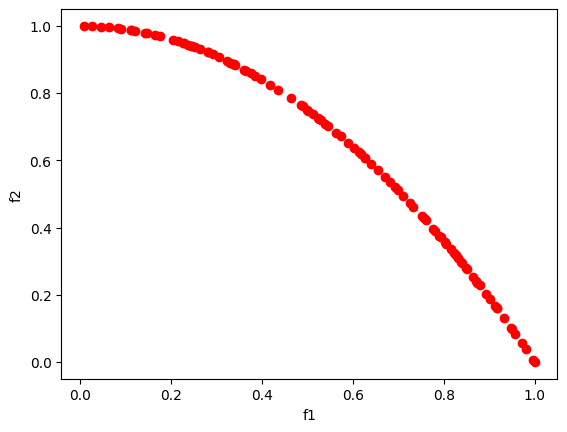

In [5]:
zdt2_objs = flp.search(name="zdt2", environment=zdt2, **config).get_obj()
plt.scatter(zdt2_objs[:,0],zdt2_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")

Text(0, 0.5, 'f2')

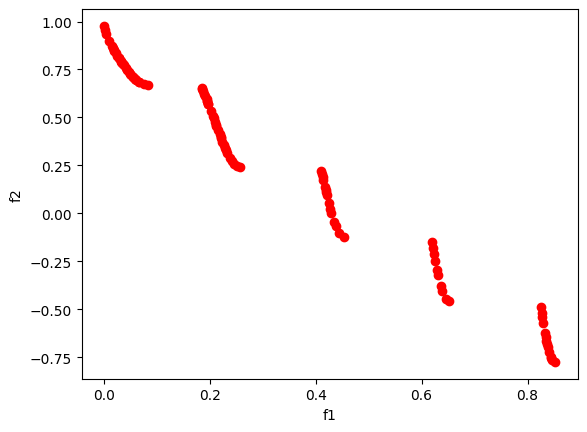

In [6]:
zdt3_objs = flp.search(name="zdt3", environment=zdt3, **config).get_obj()
plt.scatter(zdt3_objs[:,0],zdt3_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")

Text(0, 0.5, 'f2')

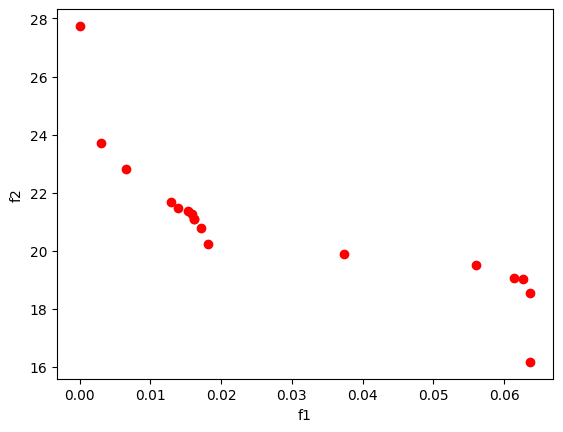

In [7]:
zdt4_objs = flp.search(name="zdt4", environment=zdt4, **config).get_obj()
plt.scatter(zdt4_objs[:,0],zdt4_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")

Text(0, 0.5, 'f2')

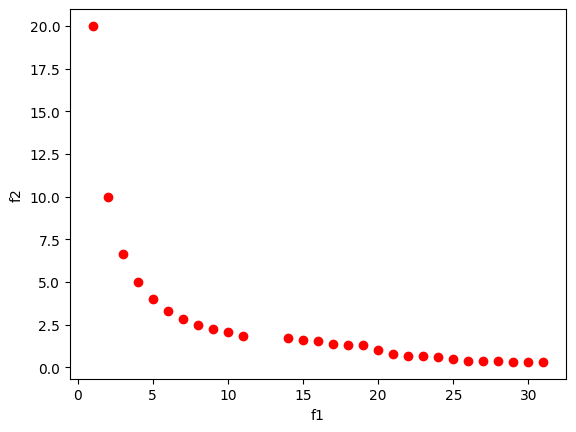

In [8]:
zdt5_objs = flp.search(name="zdt5", environment=zdt5, **config).get_obj()
plt.scatter(zdt5_objs[:,0],zdt5_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")

Text(0, 0.5, 'f2')

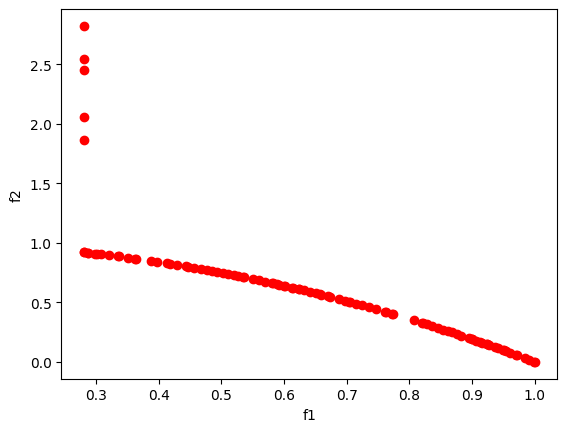

In [9]:
zdt6_objs = flp.search(name="zdt6", environment=zdt6, **config).get_obj()
plt.scatter(zdt6_objs[:,0],zdt6_objs[:,1],color="red")
plt.xlabel("f1")
plt.ylabel("f2")